In [1]:
import pandas as pd

/tmp/ipykernel_1221/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
cars = pd.read_csv("project1.csv")

In [3]:
cars.shape # rows and colm

(398, 9)

In [4]:
cars.size # number of elements

3582

In [5]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
cars.info() # seems like all of the data is non-null as non null count matches shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
#Convert horsepower into int
cars['horsepower'].str.isnumeric().sum()#We see that 6 of the elements are not numbers

392

In [9]:
import numpy as np
cars[cars['horsepower'].str.isnumeric() == False]
#We see that all of the non numeric values are '?' meaning the rest are ints
cars[cars['horsepower'].str.isnumeric() == False] = cars[cars['horsepower'].str.isnumeric() == False].replace({'?':np.nan})

/tmp/ipykernel_1221/587037959.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars[cars['horsepower'].str.isnumeric() == False] = cars[cars['horsepower'].str.isnumeric() == False].replace({'?':np.nan})


In [10]:
cars.info()# check that values were replaced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
ford_pinto = cars[cars['car_name'] == "ford pinto"]
ford_pinto['horsepower'].fillna(int(ford_pinto[1:]['horsepower'].astype(int).mean()), inplace=True)
cars.iloc[32] =ford_pinto.iloc[0]
cars.iloc[32]

/tmp/ipykernel_1221/281234212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ford_pinto['horsepower'].fillna(int(ford_pinto[1:]['horsepower'].astype(int).mean()), inplace=True)
/tmp/ipykernel_1221/281234212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ford_pinto['horsepower'].fillna(int(ford_pinto[1:]['horsepower'].astype(int).mean

mpg                   25.0
cylinders                4
displacement          98.0
horsepower              83
weight                2046
acceleration          19.0
model_year              71
origin                   1
car_name        ford pinto
Name: 32, dtype: object

In [12]:
cars[cars['horsepower'].isna()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [13]:
cars[cars['car_name'] == 'ford maverick']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick
100,18.0,6,250.0,88,3021,16.5,73,1,ford maverick
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
155,15.0,6,250.0,72,3158,19.5,75,1,ford maverick
193,24.0,6,200.0,81,3012,17.6,76,1,ford maverick


In [14]:
maverick1 = cars[cars['car_name'] == "ford maverick"]
maverick2 = maverick1[maverick1['horsepower'].notna()]
maverick2


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick
100,18.0,6,250.0,88,3021,16.5,73,1,ford maverick
155,15.0,6,250.0,72,3158,19.5,75,1,ford maverick
193,24.0,6,200.0,81,3012,17.6,76,1,ford maverick


In [15]:
maverick2['horsepower'].astype(int).mean()

81.5

In [16]:
cars[cars['car_name'] == 'ford maverick'] = cars[cars['car_name'] == 'ford maverick'].replace({np.nan:81.5})

cars[cars['car_name'] == 'ford maverick']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick
100,18.0,6,250.0,88,3021,16.5,73,1,ford maverick
126,21.0,6,200.0,81.5,2875,17.0,74,1,ford maverick
155,15.0,6,250.0,72,3158,19.5,75,1,ford maverick
193,24.0,6,200.0,81,3012,17.6,76,1,ford maverick


In [17]:
cars[cars['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [18]:
cars = cars.dropna()

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           394 non-null    float64
 1   cylinders     394 non-null    int64  
 2   displacement  394 non-null    float64
 3   horsepower    394 non-null    object 
 4   weight        394 non-null    int64  
 5   acceleration  394 non-null    float64
 6   model_year    394 non-null    int64  
 7   origin        394 non-null    int64  
 8   car_name      394 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.8+ KB


In [20]:
cars = cars.drop('car_name',axis=1)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [21]:
cars['horsepower'] = cars['horsepower'].astype(int)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           394 non-null    float64
 1   cylinders     394 non-null    int64  
 2   displacement  394 non-null    float64
 3   horsepower    394 non-null    int64  
 4   weight        394 non-null    int64  
 5   acceleration  394 non-null    float64
 6   model_year    394 non-null    int64  
 7   origin        394 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.7 KB


In [22]:
cars.describe()
# We see a large difference between the minimum and maximum values for displacement through weight. Standard deviation for weight is large

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,23.443655,5.469543,194.181472,104.355330,2974.959391,15.553807,75.961929,1.573604
std,7.786494,1.703263,104.490759,38.426436,848.552396,2.758313,3.684238,0.804513
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.125000,4.000000,105.000000,75.250000,2223.750000,13.800000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,92.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,265.750000,125.000000,3612.000000,17.075000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [23]:
#one hot encoding
cars['origin'] = cars['origin'].astype("category")
cars = pd.get_dummies(cars, columns=["origin"], drop_first=True)
cars.info()


<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           394 non-null    float64
 1   cylinders     394 non-null    int64  
 2   displacement  394 non-null    float64
 3   horsepower    394 non-null    int64  
 4   weight        394 non-null    int64  
 5   acceleration  394 non-null    float64
 6   model_year    394 non-null    int64  
 7   origin_2      394 non-null    bool   
 8   origin_3      394 non-null    bool   
dtypes: bool(2), float64(3), int64(4)
memory usage: 25.4 KB


<Axes: xlabel='model_year', ylabel='Count'>

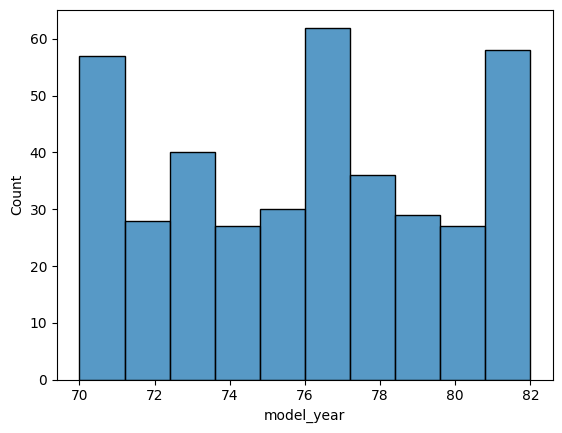

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=cars['model_year'])

<Axes: xlabel='weight', ylabel='Count'>

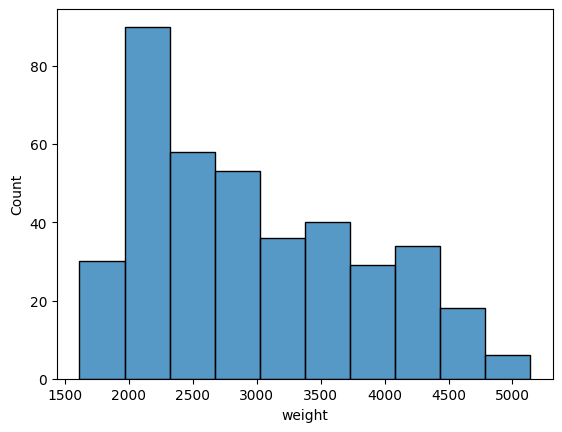

In [25]:
sns.histplot(data=cars['weight'] )

<Axes: ylabel='displacement'>

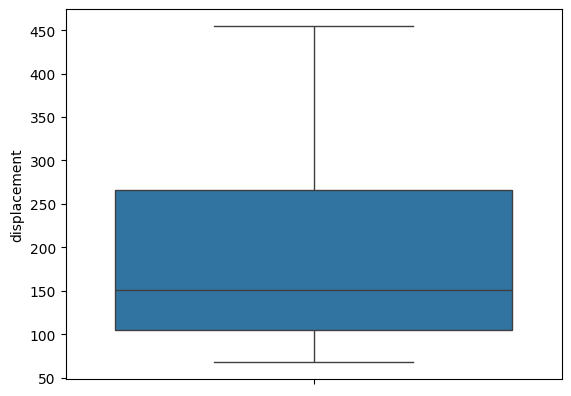

In [26]:
sns.boxplot(data=cars['displacement'])

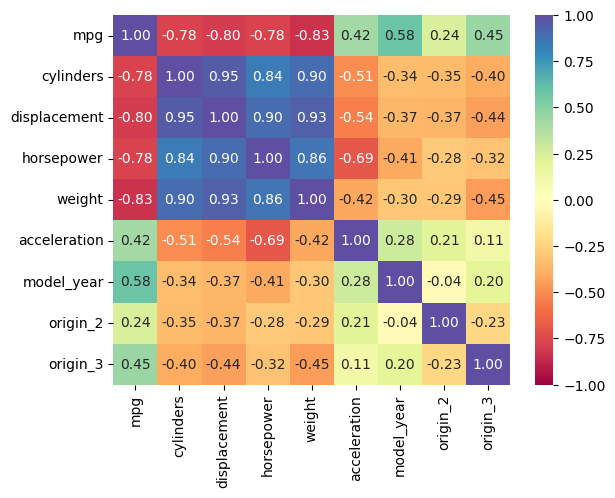

In [27]:
corr_cols = ['mpg','cylinders','displacement','horsepower', 'weight','acceleration','model_year','origin_2','origin_3']
# the actual heat map
sns.heatmap(
   cars[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# show the plot
plt.show()

Text(0.5, 1.0, 'Weight v MPG')

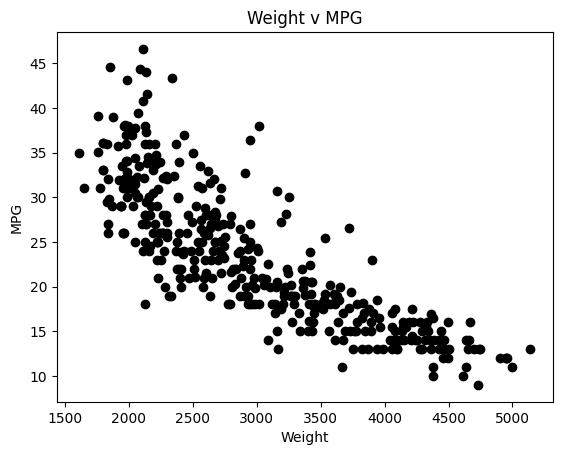

In [28]:
import matplotlib.pyplot as plt
plt.scatter(cars['weight'], cars['mpg'], color="black")
plt.xlabel('Weight')
plt.ylabel('MPG') 
plt.title('Weight v MPG')

Text(0.5, 1.0, 'Horsepower v MPG')

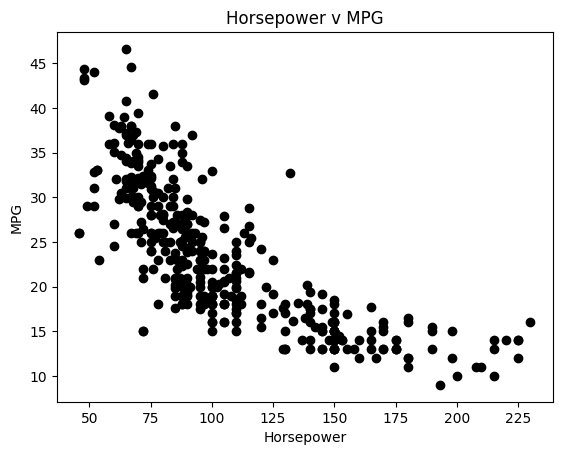

In [29]:
plt.scatter(cars['horsepower'], cars['mpg'], color="black")
plt.xlabel('Horsepower')
plt.ylabel('MPG') 
plt.title('Horsepower v MPG')

Text(0.5, 1.0, 'Cylinders v MPG')

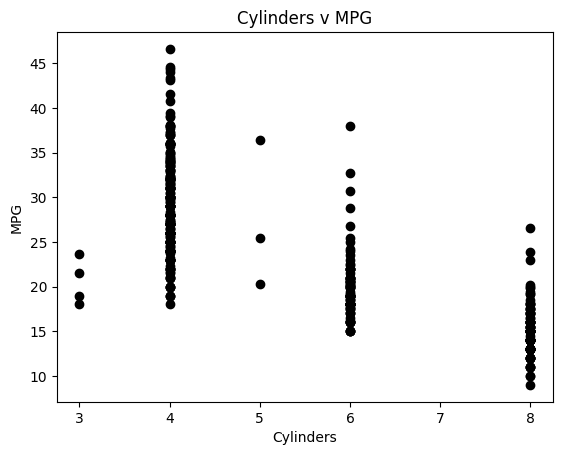

In [30]:
plt.scatter(cars['cylinders'], cars['mpg'], color="black")
plt.xlabel('Cylinders')
plt.ylabel('MPG') 
plt.title('Cylinders v MPG')

In [31]:
x = cars.drop("mpg",axis=1)
y = cars['mpg']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [32]:
from sklearn import linear_model
cars_lr = linear_model.LinearRegression()
cars_lr.fit(x_train,y_train)


LinearRegression()

In [33]:
y_predict = cars_lr.predict(x_test)

In [34]:
error = abs(y_test - y_predict)
error.median()

1.932061557344582

In [35]:
error.mean()

2.4929228541421997

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)
print("The accuracy of our linear regression model is {}%".format(r2*100))

The accuracy of our linear regression model is 83.43924005720167%


In [37]:
from sklearn.metrics import mean_absolute_error
MBE = mean_absolute_error(y_test, y_predict)
print("The Mean Absolute Error of our Model is {}".format(MBE))

The Mean Absolute Error of our Model is 2.4929228541421997


In [38]:
from sklearn.metrics import mean_squared_error

score = np.sqrt(mean_absolute_error(y_test, y_predict))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 1.58


In [39]:
cars_lr.score(x_test,y_test)

0.8343924005720167

In [40]:
cars_lr.score(x_train, y_train)

0.8164001568264865

Text(0.5, 1.0, 'Cylinders v MPG')

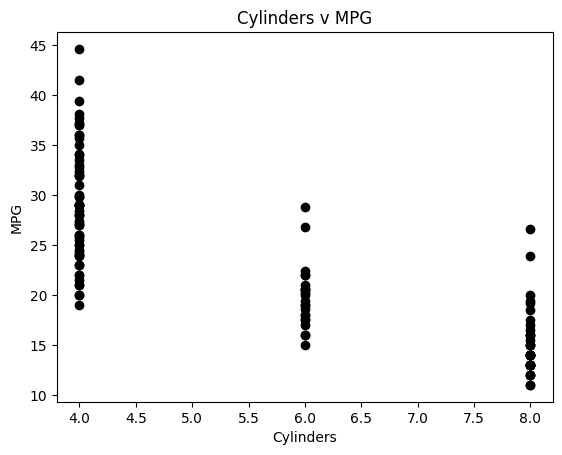

In [41]:
plt.scatter(x_test['cylinders'], y_test, color="black")
plt.xlabel('Cylinders')
plt.ylabel('MPG') 
plt.title('Cylinders v MPG')